In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')

# Decision Tree

What is a Decision Tree
---

### A Nonparametric Machine Learning Algorithm

In logistic regression, we look at the data graphically and separate the data using a line. The model is defined by the coefficients and **parameters** that define the line. Therefore, logistic regression model is a **parametric** machine learning algorithm.

This module introduces **decision tree**, which is an example of a **nonparametric** machine learning algorithm. It is not defined by a list of parameters like we what we saw before.

### Tree Terminology

Decision tree is basically a flowchart of conditions used on data points to reach predictions. Below is an example given in the Sololearn course - a decision tree model for the Titanic dataset.

Each of the rectangle is called a **node**. The nodes which have conditions to split on is called **internal nodes**. The very first internal node at the top is called the root node. The final nodes that contain the predictions are called **leaf nodes**. Internal nodes all have two nodes below them, which we call the nodes' **children**.

![Example tree chart](https://api.sololearn.com/DownloadFile?id=3841)

### Interpreting Decision Trees

We start with the root node and respond to each internal node and arrive at their child nodes until we eventually arrive at a leaf node, which is our prediction.

### Building Decision Trees

When building a decision tree, we don't just randomly choose which feature to split on first. We want to start by choosing the feature with the most **predictive power**.

How to Build a Decision Tree
---

### What Makes a Good Split

In order to determine which feature to split on first, we need to score every possible split so we can choose the split with the highest score. The mathematical term we'll be measuring is **information gain**. This will be a value from 0 to 1, where 0 is the information gain of a useless split and 1 is that of a perfect split. 

For example, if we split on sex,

![Split on sex decision tree](https://api.sololearn.com/DownloadFile?id=3845)

In [2]:
df.value_counts(["Sex", "Survived"], sort=False)

Sex     Survived
female  0            81
        1           233
male    0           464
        1           109
dtype: int64

The vast majority of female survived while the cast majority of male didn't. This is a good split. We are going for **homogeneity** (or **purity**), which means ideally we send the data points of the same class to the same side of a split.

### Gini Impurity

**Gini impurity** is the measure of how pure a dataset is, that is used to calculate the information gain.

We calculate the Gini impurity on a subset of our data based on how many data points in the set are positive and how many that are negative. It will be a value between 0 and 0.5, where 0 is completely pure and 0.5 is completely impure. The formula is as follows, where $p$ is the percentage of positive cases.

$$Gini = 2 \times p \times (1-p)$$

Below is a graph of Gini impurity vs p.

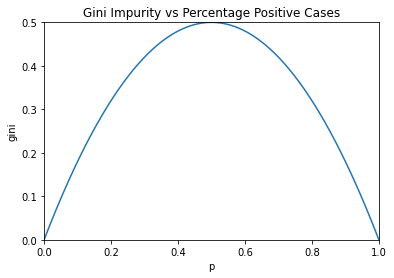

In [3]:
gini_formula = lambda p: 2 * p * (1 - p)
p = np.linspace(0, 1, 1000)

plt.plot(p, gini_formula(p))
plt.title("Gini Impurity vs Percentage Positive Cases")
plt.xlabel("p")
plt.ylabel("gini")
plt.xlim(0, 1)
plt.ylim(0, 0.5)
plt.show()

We can see that when exactly half of the data points are positive, then the dataset is deemed impure and has the maximum Gini impurity of 0.5. If all the cases are either positive or negative, then the dataset is deemed completely pure and has the minimum Gini impurity of 0.

If we want to split on age at 30,

In [4]:
print("=== Split by Age at 30 ===")

age_condition = df["Age"] <= 30
young_survived = df[age_condition]["Survived"]
old_survived = df[~age_condition]["Survived"]

young_total = young_survived.size
young_q, young_p = young_survived.value_counts() / young_total
young_gini = gini_formula(young_p)

print("--- Age <= 30 ---")
print("Percent of passengers who didn't survive", young_q)
print("Percent of passengers who survived", young_p)
print("Gini imputiry", young_gini)

old_total = old_survived.size
old_q, old_p = old_survived.value_counts() / old_total
old_gini = gini_formula(old_p)

print("--- Age > 30 ---")
print("Percent of passengers who didn't survive", old_q)
print("Percent of passengers who survived", old_p)
print("Gini imputiry", old_gini)

=== Split by Age at 30 ===
--- Age <= 30 ---
Percent of passengers who didn't survive 0.6247619047619047
Percent of passengers who survived 0.37523809523809526
Gini imputiry 0.4688689342403628
--- Age > 30 ---
Percent of passengers who didn't survive 0.5994475138121547
Percent of passengers who survived 0.4005524861878453
Gini imputiry 0.4802203839931625


Both values are close to 0.5. This means that the sets are impure.

Now, we try splitting on sex,

In [5]:
def show_split_impurity(df, cond, targ_name, formula=gini_formula):
    
    cond_name = cond.name
    left_targ = df[cond][targ_name]
    right_targ = df[~cond][targ_name]
    
    print(f"=== Split by {cond_name} ===")
    
    def arr_impurity(targ, side=''):

        total = targ.size
        counts = targ.value_counts(sort=False)
        q, p = counts / total
        q_name, p_name = counts.index
        impurity = formula(p)

        print(f"--- {side} ---")
        print(f"Percent of {targ_name} {q_name} :", q)
        print(f"Percent of {targ_name} {p_name} :", p)
        print(f"Imputiry", impurity)

    arr_impurity(left_targ, "Left")
    arr_impurity(right_targ, "Right")

In [6]:
show_split_impurity(df, df["Sex"] == "female", "Survived")

=== Split by Sex ===
--- Left ---
Percent of Survived 0 : 0.25796178343949044
Percent of Survived 1 : 0.7420382165605095
Imputiry 0.3828350034484158
--- Right ---
Percent of Survived 0 : 0.8097731239092496
Percent of Survived 1 : 0.19022687609075042
Imputiry 0.30808122340700944


Both of the Gini values are smaller than that of splitting on age, so we determine that splitting on sex is a better choice.

### Entropy
**Entropy** is another measure of purity. It will be a value between 0 and 1 where 1 is completely impure and 0 is completely pure. The formula for entropy comes from physics, where `p` again is the percentage of passenger that survived.

$$entropy = -[p \log_2p + (1-p) \log_2(1-p)]$$

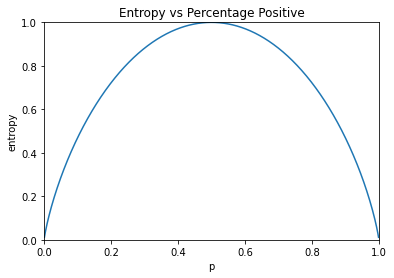

In [7]:
entropy_formula = lambda p: - (p * np.log2(p) + (1-p) * np.log2(1-p))
p = np.linspace(0, 1, 1000)[1:-1]

plt.plot(p, entropy_formula(p))
plt.title("Entropy vs Percentage Positive")
plt.xlabel("p")
plt.ylabel("entropy")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

A graph containing the two functions shows that they are similar.

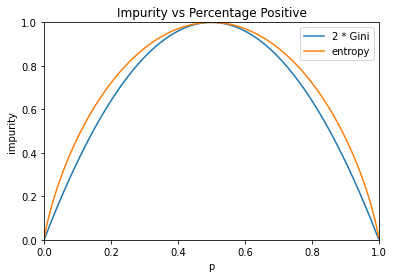

In [8]:
p = np.linspace(0, 1, 1000)[1:-1]

plt.plot(p, 2 * gini_formula(p), label="2 * Gini")
plt.plot(p, entropy_formula(p), label="entropy")
plt.title("Impurity vs Percentage Positive")
plt.legend()
plt.xlabel("p")
plt.ylabel("impurity")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

Now let's calculate the entropy values for the same two potential splits.

In [9]:
show_split_impurity(df, df["Age"] <= 30, "Survived", entropy_formula)
show_split_impurity(df, df["Sex"] == "female", "Survived", entropy_formula)

=== Split by Age ===
--- Left ---
Percent of Survived 0 : 0.6247619047619047
Percent of Survived 1 : 0.37523809523809526
Imputiry 0.9546092964627468
--- Right ---
Percent of Survived 0 : 0.5994475138121547
Percent of Survived 1 : 0.4005524861878453
Imputiry 0.971272860860505
=== Split by Sex ===
--- Left ---
Percent of Survived 0 : 0.25796178343949044
Percent of Survived 1 : 0.7420382165605095
Imputiry 0.8236550739295192
--- Right ---
Percent of Survived 0 : 0.8097731239092496
Percent of Survived 1 : 0.19022687609075042
Imputiry 0.7019458258949879


When splitting on age at 30, both entropy values are close to 1, which means the sets are impure. When splitting on sex, the entropy values are much smaller, so it is a better split.

_It is not obvious whether Gini impurity or entropy is a better choice. It often won't make a difference, but you can always cross validate with both metrics._

### Information Gain
With ways of calculating a numeric value for impurity, we can define **information gain**.

$$information\space{}gain = H(S) - \frac{\lvert{}A\rvert{}}{\lvert{}S\rvert{}}H(A) - \frac{\lvert{}B\rvert{}}{\lvert{}S\rvert{}}H(B)$$

H is our impurity measure (either Gini impurity or entropy). S is the original dataset and A and B are the two sets we are splitting the dataset S into. $\vert{S}\vert$ denotes the size of a dataset S. 

Let's calculate this value for our two examples with Gini impurity as our impurity measure. First, we define a `gini` function that takes in a dataset and return the Gini impurity of it in accordance to how $H$ is used in the formula.

In [10]:
def gini(s):
    tc = s.size
    q, p = s.value_counts(sort=False) / tc
    return gini_formula(p)

In [11]:
information_gain_formula = lambda h, s, a, b: h(s) - a.size/s.size * h(a) - b.size/s.size * h(b)


def show_information_gain(df, cond, targ_name, impurity=gini):
    
    cond_name = cond.name  # column name of the splitting condition
    impurity_name = impurity.__name__  # name of the impurity function
    
    print(f"=== Split by {cond_name} ===")
    print(f"Impurity function : {impurity_name}")
    
    a = df[cond][targ_name]
    b = df[~cond][targ_name]
    s = df[targ_name]
    
    a_size = len(a)
    b_size = len(b)
    s_size = a_size + b_size
    
    a_impurity = impurity(a)
    b_impurity = impurity(b)
    s_impurity = impurity(s)
    
    print("--- Dataset: all ---")
    print(f"Size: {s_size}")
    print(f"Impurity: {s_impurity}")
    
    print("--- Dataset: left ---")
    print(f"Size: {a_size}")
    print(f"Impurity: {a_impurity}")
    
    print("--- Dataset: right ---")
    print(f"Size: {b_size}")
    print(f"Impurity: {b_impurity}")
    
    information_gain = information_gain_formula(impurity, s, a, b)
    print("--- Information gain ---")
    print(information_gain)

In [12]:
show_information_gain(df, df["Age"] <= 30, "Survived")

=== Split by Age ===
Impurity function : gini
--- Dataset: all ---
Size: 887
Impurity: 0.4738112457404905
--- Dataset: left ---
Size: 525
Impurity: 0.4688689342403628
--- Dataset: right ---
Size: 362
Impurity: 0.4802203839931625
--- Information gain ---
0.00030958905310010665


The value is very small meaning we gain little from using this split.

Now, let's split on sex.

In [13]:
show_information_gain(df, df["Sex"] == "female", "Survived")

=== Split by Sex ===
Impurity function : gini
--- Dataset: all ---
Size: 887
Impurity: 0.4738112457404905
--- Dataset: left ---
Size: 314
Impurity: 0.3828350034484158
--- Dataset: right ---
Size: 573
Impurity: 0.30808122340700944
--- Information gain ---
0.13926701564464045


The information gain for this split is much higher. Therefore, splitting on sex first is a much better when building our decision tree.

Below is additional code that uses entropy as the impurity measure. The results arrive at the same conclusion.

In [14]:
def entropy(s):
    tc = s.size
    q, p = s.value_counts(sort=False) / tc
    return entropy_formula(p)


show_information_gain(df, df["Age"] <= 30, "Survived", entropy)
show_information_gain(df, df["Sex"] == "female", "Survived", entropy)

=== Split by Age ===
Impurity function : entropy
--- Dataset: all ---
Size: 887
Impurity: 0.9618806789594467
--- Dataset: left ---
Size: 525
Impurity: 0.9546092964627468
--- Dataset: right ---
Size: 362
Impurity: 0.971272860860505
--- Information gain ---
0.0004706944335788332
=== Split by Sex ===
Impurity function : entropy
--- Dataset: all ---
Size: 887
Impurity: 0.9618806789594467
--- Dataset: left ---
Size: 314
Impurity: 0.8236550739295192
--- Dataset: right ---
Size: 573
Impurity: 0.7019458258949879
--- Information gain ---
0.21684950483126508


### Building the Decision Tree

We've explored the foundation of building a decision tree - how to choose between possible splits. The process we go through building a complete decision tree is as follow:

To determine each split, we go through every possible split, calculate the information gain and choose the one with the highest value. It means that for numerical features, like age, P-class and fare, we try every possible **threshold**. For example, since there are 89 different ages in our dataset, we have 88 different splits to try for the age feature alone.

The process begins with the first split. Then, upon every split, we test for all features and thresholds and choose the one with the highest information gain. We can split on an individual feature twice for two different thresholds. We continue doing this process until we have no more features to split on.

_There is a lot of things to try, which costs a substantial amount of processing power. It can make a decision tree slow to build, but it will be very fast to make a prediction._

### Making Predictions with Decision Tree

Here's an example of making a prediction for a passenger. The passenger is:
- Sex: female
- Pclass: 3
- Fare: 25
- Age: 30

![Example of making a prediction with decision tree on the titanic dataset](https://api.sololearn.com/DownloadFile?id=3895)

Decision Trees in Scikit-learn
---

Scikit-learn is very consistent in the way it allows you to create, train and make predictions of a model. The process of building a decision tree is identical to that of building a logistic regression.

We need to prepare the data first. This involves converting the sex column to boolean, which the computer can interpret better, and separating features and target.

In [15]:
df["SexBool"] = df["Sex"] == "male"
X = df.iloc[:, np.r_[1, 3:8]].to_numpy()
y = df["Survived"].to_numpy()

print("X", X[:5])
print("y", y[:5])

X [[3 22.0 1 0 7.25 True]
 [1 38.0 1 0 71.2833 False]
 [3 26.0 0 0 7.925 False]
 [1 35.0 1 0 53.1 False]
 [3 35.0 0 0 8.05 True]]
y [0 1 1 1 0]


Just like with `LogisticRegression`, we import the `DecisionTreeClassifier` class, split the data into training and test sets, train the evaluate the model, and make predictions.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1952)

model = DecisionTreeClassifier(random_state=1975)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("=== Decision Tree ===")
print("Accuracy :", model.score(X_test, y_test))
print("Percision :", precision_score(y_test, y_pred))
print("Recall :", recall_score(y_test, y_pred))

=== Decision Tree ===
Accuracy : 0.7837837837837838
Percision : 0.7285714285714285
Recall : 0.6375


We can compare its performance with that of a logistic regression model. We use K-fold cross validation to get more accurate results. _We set the `random_state` attribute to get the same result every run._

In [17]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


def show_kfold_metrics(X, y, kf, model,
                       metrics=[accuracy_score, precision_score, recall_score],
                       name=None):
    
    if not name:
        name = model.__class__.__name__
        
    # convert a metrics function to a string index
    make_index = lambda f: f.__name__.rstrip("_score").replace("_", " ").title()
    
    scores = pd.DataFrame(index=np.arange(kf.n_splits),
                          columns=pd.Series(metrics).apply(make_index))
    
    row = 0

    for train_index, test_index in kf.split(X, y):
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        col = 0
        for func in metrics:
            scores.iat[row, col] = func(y_test, y_pred)
            col += 1
        row += 1
        
    print(f"=== {name} ===")
    print(scores.mean().to_string())

In [18]:
kf = KFold(n_splits=5, shuffle=True, random_state=1968)

model_lr = LogisticRegression()

show_kfold_metrics(X, y, kf, model)
show_kfold_metrics(X, y, kf, model_lr)

=== DecisionTreeClassifier ===
Accuracy     0.780086
Precision    0.708428
Recall       0.741092
=== LogisticRegression ===
Accuracy     0.802723
Precision    0.767260
Recall       0.703758


You can see that the accuracy and precision of the logistic regression model is higher, but the recall of decision tree is higher.

_Although the logistic regression model performs better overall, we may still want to use a decision tree for interpretability._

### Gini vs Entropy
The default impurity **criterion** in Scikit-learn's decision tree algorithm is the Gini impurity. However, they've also implemented entropy and you can choose which one to use when you create `DecisionTreeClassifier` object. The link to its documentations is [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

We compare the decision trees with gini and entropy as criterion in the same way we compare a decision tree and a logistic regression.

In [19]:
model_entropy = DecisionTreeClassifier(criterion="entropy")

show_kfold_metrics(X, y, kf, model, name="Decision Tree - gini")
show_kfold_metrics(X, y, kf, model_entropy, name="Decision Tree - entropy")

=== Decision Tree - gini ===
Accuracy     0.780086
Precision    0.708428
Recall       0.741092
=== Decision Tree - entropy ===
Accuracy     0.787977
Precision    0.722997
Recall       0.739753


There is very little difference between Gini impurity and entropy, so the performance of models using either of them should be roughly the same.

### Visualizing Decision Trees
To create a png image of your decision tree, you can use Scikit-learn's `export_graphviz` function. It takes in the decision tree model  and returns in the format of a dot file, which can be interpreted into an image.

In [20]:
from sklearn.tree import export_graphviz


feature_names = df.columns[np.r_[1, 3:8]]

dot_file = export_graphviz(model, feature_names=feature_names)

Using `graphviz` module, we can render the .dot file into an image.

_Set the `cleanup` attribute to `True` to get rid of the unnecessary source file after rendering._

In [21]:
import graphviz


graph = graphviz.Source(dot_file)
graph_file = graph.render(filename="decision_tree", format="png", cleanup=True)

Use `IPython` to display the image within this notebook.

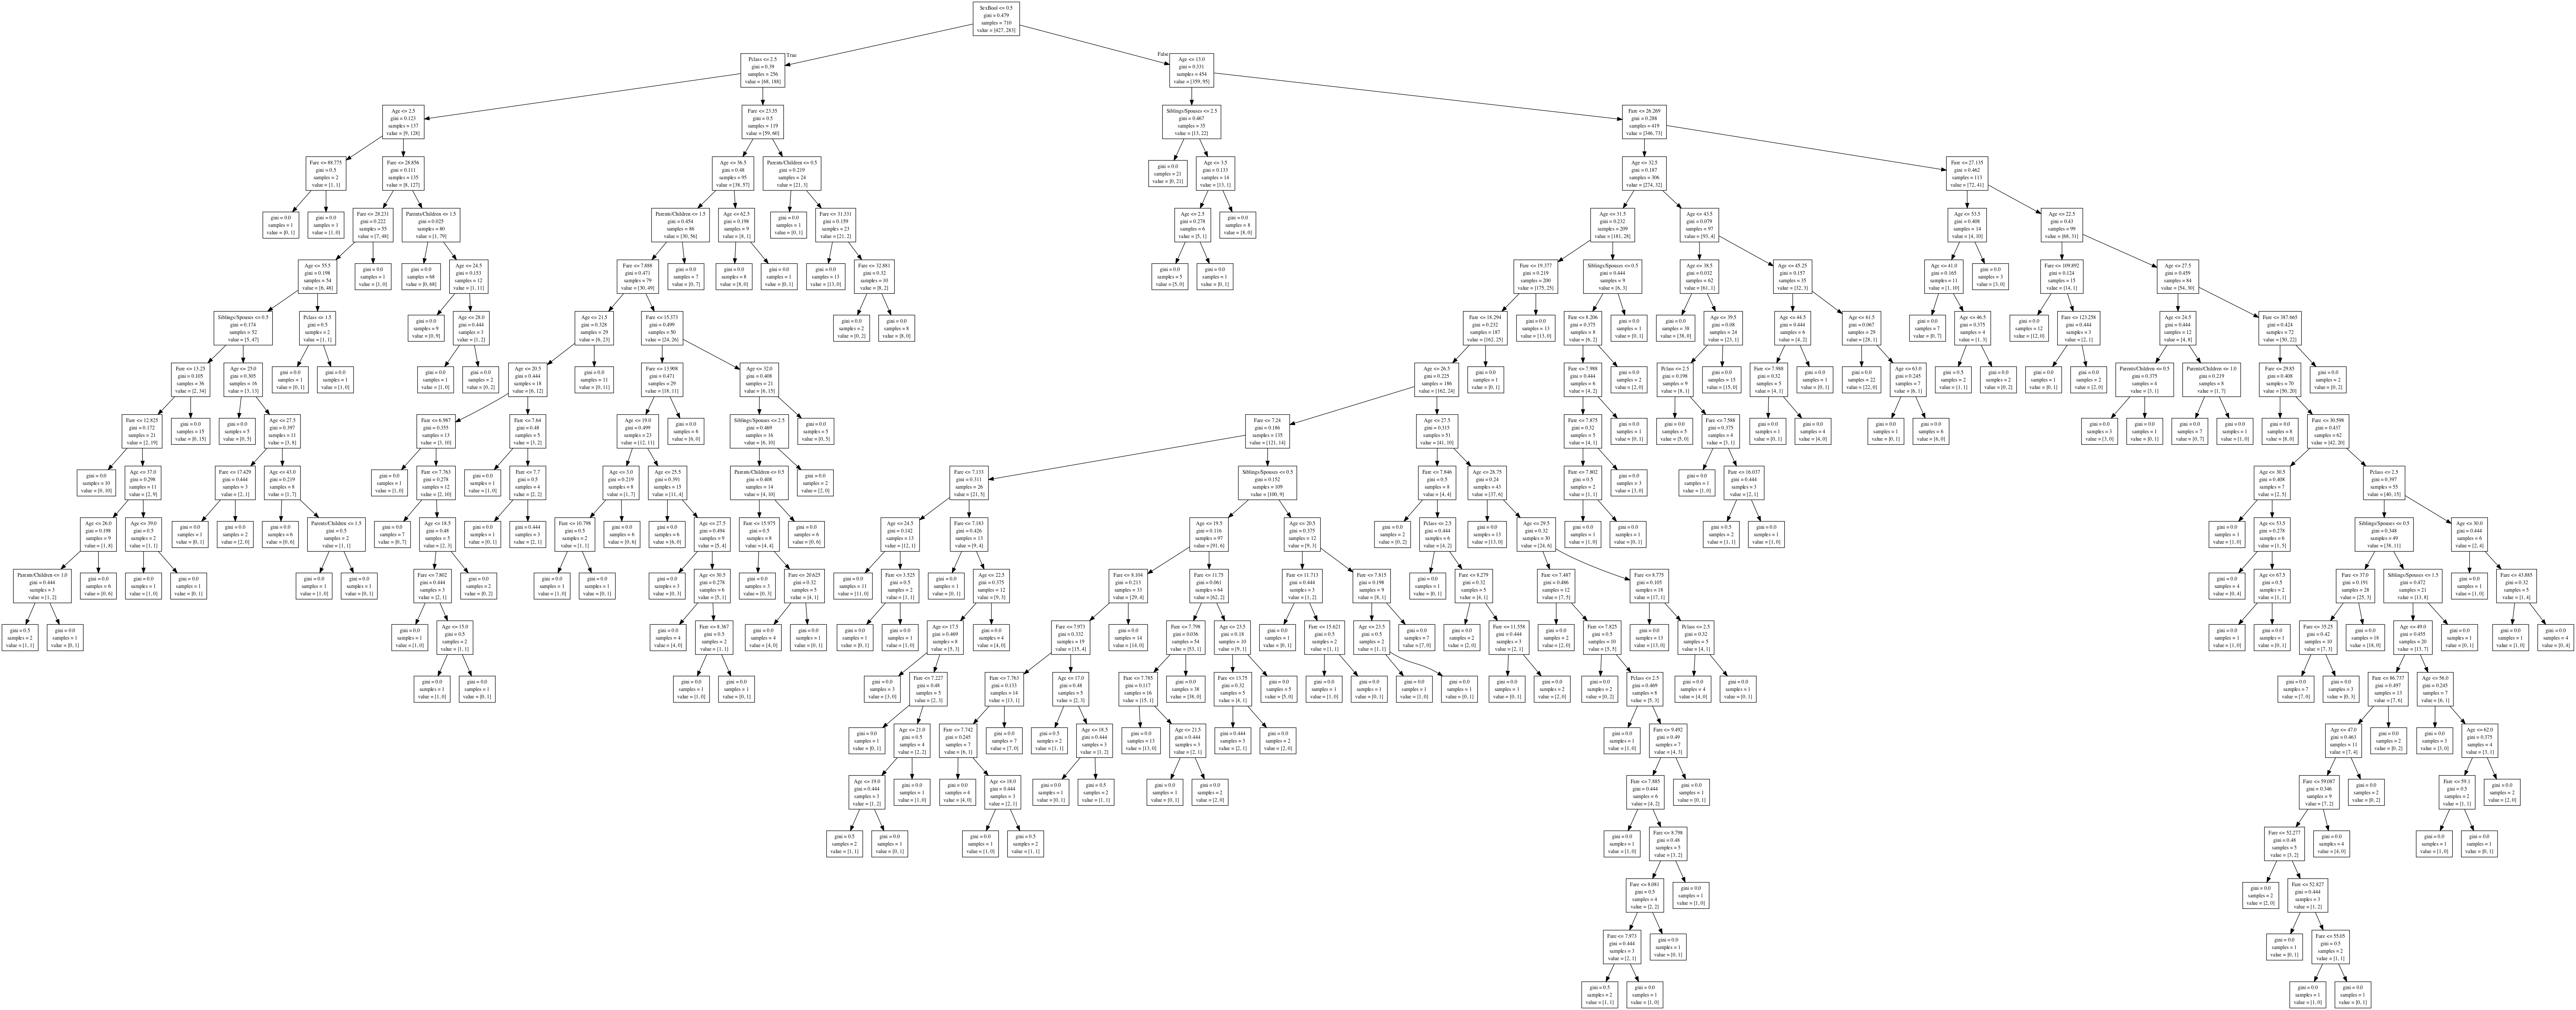

In [22]:
from IPython.display import Image


Image(filename=graph_file)

In [23]:
def show_decision_tree(model, **kwargs):
    dot_file = export_graphviz(model, **kwargs)
    graph = graphviz.Source(dot_file)
    graph_file = graph.render(filename="temp", format="png", cleanup=True)
    return Image(filename=graph_file)

Overfitting in Decision Trees
---

### Tendency to Overfit
Overfitting is when we build a good model for the training set, but it doesn't perform well on the test set. Decision trees are incredibly prone to overfitting, since they can keep having additional nodes in the tree that split on features, the model can really dig deep into the specifics of the training set. Depending on the data, this might result in a model that doesn't capture the true nature of the data and doesn't generalize.

In our example, age could have 89 different thresholds, this result it being split up to 9 times in a single path. This gives the data points in our dataset too much power, making the model too fine-gained and missing the essence of the data.

### Pruning

In order to solve this issue, we use a technique called **pruning**. This means we make the tree smaller in the goal of reducing overfitting.

There are two types of pruning: pre-pruning and post-pruning. In pre-pruning, we have rules of stop building the tree before it gets too big. In post-pruning, we build the whole tree then we review the tree and decide which leaves to remove to make the tree smaller.

_The word pruning comes from the same term in framing, where farmers cut off brunches of trees._

### Pre-pruning

Pruning is a balance. For example, you can lessen max depth to limit the maximum split for each datapoint and reduce the presence of overfitting. However, if you set it too small, you won't have much of a tree with sufficient predictive power. This is called underfitting.

Pre-pruning is easier to implement in Scikit-learn than post-pruning. We have a few options for limiting tree growth, we pass them as arguments when initializing the decision tree. These arguments include:
- `max_depth` the maximum depth of the tree;
- `min_samples_leaf` the minimum number of samples required to be at a leaf node;
- `max_leaf_nodes` the maximum number of leaf nodes;

=== DecisionTreeClassifier ===
Accuracy     0.813978
Precision    0.787609
Recall       0.714401


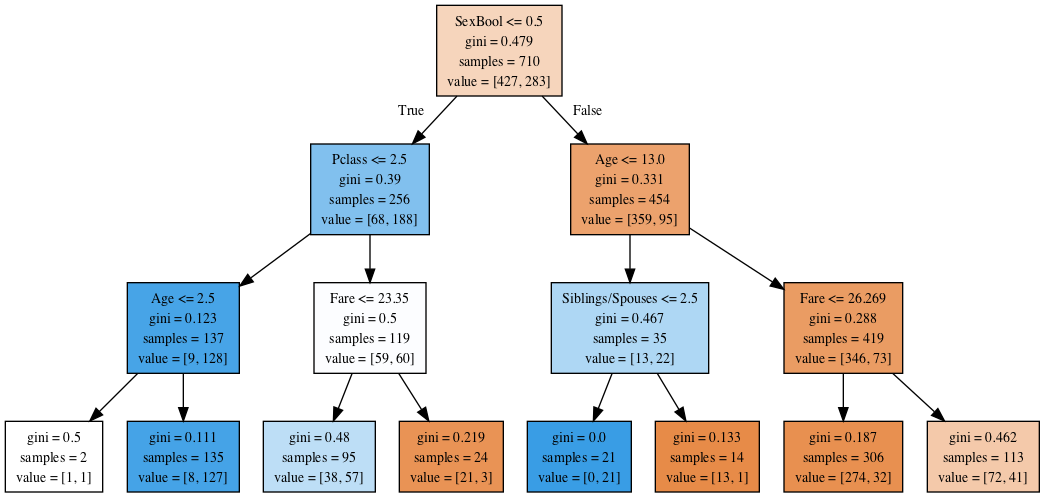

In [24]:
model_pruned = DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, max_leaf_nodes=10)

show_kfold_metrics(X, y, kf, model_pruned)

show_decision_tree(model_pruned, feature_names=feature_names, filled=True)

### Grid Search

In order to decide on the best values for pre-pruning parameters, we use __cross validation__ and compare metrics. Instead of looping through all combinations like what we did previously, we use the grid search cross validation built in to scikit-learn. We list all the parameter names and their possible values in a dictionary.

In [40]:
param_grid = {
    "max_depth": np.arange(10, 36, 5),
    "min_samples_leaf": np.arange(1, 4),
    "max_leaf_nodes": np.arange(10, 46, 5)
}

We then import grid search and initiate an object using the above parameter grid, setting the score metric to f1 and do 5-fold cross validation. Then, we fit the grid search object to our data.

In [41]:
%%capture

from sklearn.model_selection import GridSearchCV


model_gs = DecisionTreeClassifier()
gs = GridSearchCV(model_gs, param_grid, scoring="f1", cv=5)
gs.fit(X, y)

The grid search tried every combination of the values given in the parameter grid and settled on the ones with best score. We can print out parameter values and score of the best model.

In [42]:
print("best parameters\n", gs.best_params_)
print("best score\n", gs.best_score_)

best parameters
 {'max_depth': 30, 'max_leaf_nodes': 35, 'min_samples_leaf': 1}
best score
 0.7745375458302277


We can use these parameters to build the best possible model.

In [46]:
model_gs = DecisionTreeClassifier(**gs.best_params_)

show_kfold_metrics(X, y, kf, model_gs)

=== DecisionTreeClassifier ===
Accuracy     0.826325
Precision    0.801207
Recall       0.731701


Decision Tree Pros and Cons
---

### Computation
When talking about how much **computation** is needed for a machine learning algorithm, we separate it into two questions: how much computation is required to build the model and how much is required to predict.

A decision tree is very computationally expensive to build. This is because at every node we are exhausting every possible feature and threshold. We have to calculate the information gain of each of these splits. However, predicting with a decision tree is very computationally inexpensive. It just goes through a series of comparisons. 

_Generally, we care much more about the computation time for prediction more than training, because users usually demand prediction in real time._

### Performance

Decision Trees can perform decently well as a classifier, although it is more prone to **overfitting**. Since a leaf node can only have one data point while others have a dozen, it gives too much power for a single data point.

To remedy this issue, decision trees usually require some tuning to get the best possible model. Pruning techniques are used to limit the size of the tree and they help mitigate overfitting.

### Interpretability
The main advantage of choosing decision trees is that they are easy to interpret. Due to its interpretablity, it is easy to give an explanation for any prediction. For instance as a bank manager, you can explain the reason for rejecting a loan to avoid legal complications of alleged  discriminatory practices.